In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv(r"loan_approval_dataset.csv")
df.head(5)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [ ]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [ ]:
df.drop(columns=['loan_id'], inplace=True)

In [ ]:
df.columns

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [ ]:
# Remove leading spaces from column names
df.rename(columns=lambda x: x.strip(), inplace=True)

# Display the updated DataFrame
print(df.columns)

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
# Find unique values in each column
for col in df.columns:
  unique_values = df[col].unique()
  print(f"Column: {col}")
  print(f"Unique Values: {unique_values}")
  print("-"*20)

Column: no_of_dependents
Unique Values: [2 0 3 5 4 1]
--------------------
Column: education
Unique Values: [' Graduate' ' Not Graduate']
--------------------
Column: self_employed
Unique Values: [' No' ' Yes']
--------------------
Column: income_annum
Unique Values: [9600000 4100000 9100000 8200000 9800000 4800000 8700000 5700000  800000
 1100000 2900000 6700000 5000000 1900000 4700000  500000 2700000 6300000
 5800000 6500000 4900000 3100000 2400000 7000000 9000000 8400000 1700000
 1600000 8000000 3600000 1500000 7800000 1400000 4200000 5500000 9500000
 7300000 3800000 5100000 4300000 9300000 7400000 8500000 8800000 3300000
 3900000 8300000 5600000 5300000 2600000  700000 3500000 9900000 3000000
 6800000 2000000 1000000  300000 6600000 9400000 4400000  400000 6200000
 9700000 7100000  600000 7200000  900000  200000 1800000 4600000 2200000
 2500000 8600000 4000000 5200000 8900000 1300000 4500000 8100000 9200000
 2800000 7500000 6400000 6900000 7700000 3200000 7900000 5900000 3400000
 2

### Converting categorical columns into numerical

In [ ]:
df['education']=df['education'].apply( lambda x:1 if x==' Graduate' else 0)
df['self_employed']=df['self_employed'].apply( lambda x:1 if x==' Yes' else 0)

In [ ]:
df['loan_status']=df['loan_status'].apply( lambda x:1 if x==' Approved' else 0)

In [ ]:
df.head(5)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


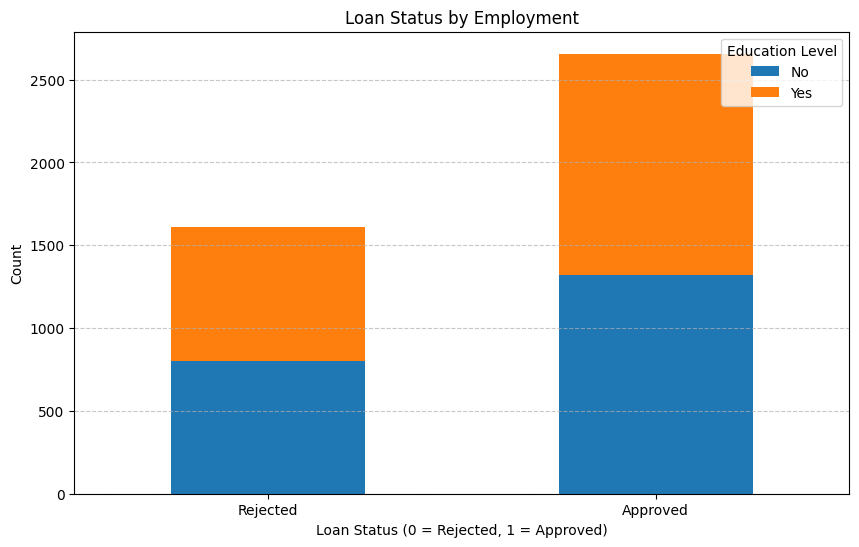

In [ ]:
grouped = df.groupby(['loan_status', 'self_employed']).size().unstack()

# Plotting the bar plot
grouped.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding custom labels
plt.title('Loan Status by Employment')
plt.xlabel('Loan Status (0 = Rejected, 1 = Approved)')
plt.ylabel('Count')
plt.legend(
    title='Education Level',
    labels=['No', 'Yes'],
    loc='upper right'
)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding custom tick labels for Loan Status
plt.xticks(ticks=[0, 1], labels=['Rejected', 'Approved'], rotation=0)

plt.show()

<Axes: >

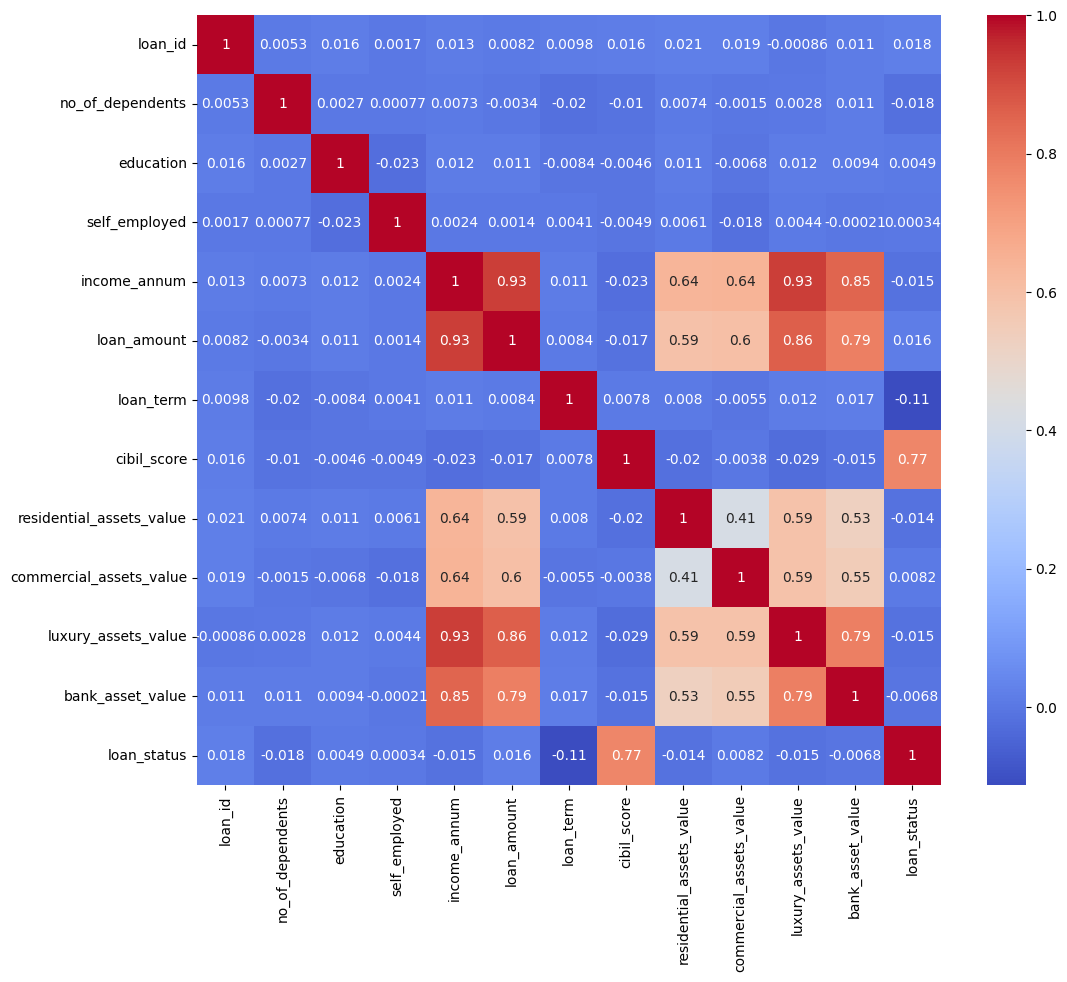

In [ ]:
import seaborn as sns
corr_matrix = df.corr()
# Adjust the figsize here
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [ ]:
df_copy=df.copy()
df_copy.drop(columns=['education'], inplace=True)
df_copy.drop(columns=['bank_asset_value'], inplace=True)
df_copy.drop(columns=['luxury_assets_value'], inplace=True)

In [ ]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Define features
numerical_features = ['income_annum', 'loan_amount', 'loan_term', 'cibil_score',
                      'residential_assets_value', 'commercial_assets_value']

categorical_features = ['no_of_dependents', 'self_employed']
target = 'loan_status'

# Step 2: Separate features (X) and target (y)
X = df_copy[numerical_features + categorical_features]
y = df_copy[target]

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Scale numerical features
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Step 5: Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 6: Predictions
y_pred = model.predict(X_test)

# Step 7: Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9016393442622951
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87       318
           1       0.92      0.93      0.92       536

    accuracy                           0.90       854
   macro avg       0.90      0.89      0.89       854
weighted avg       0.90      0.90      0.90       854



### Saving trained ML models and Scaler functions as .pkl files for independent use in any application.

In [ ]:
import pickle

# Save the scaler
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

# Save the trained model
with open('model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

print("Scaler and model saved successfully!")


Scaler and model saved successfully!


In [ ]:
import pickle
import numpy as np

# Load the scaler and model
with open('scaler.pkl', 'rb') as scaler_file:
    scaler = pickle.load(scaler_file)

with open('model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)




In [ ]:
features = [[6500000, 23900000, 18, 457, 1200000, 12400000, 2, 0]]

# Convert features to a DataFrame to apply the same transformations
import pandas as pd
df = pd.DataFrame(features, columns=['income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'no_of_dependents', 'self_employed'])

# Separate numerical and categorical features
numerical_features = ['income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value']
categorical_features = ['no_of_dependents', 'self_employed']

# Transform the numerical features using the loaded scaler
df[numerical_features] = scaler.transform(df[numerical_features])

# Make prediction
prediction = model.predict(df)

print(f'Prediction: {prediction[0]}')


Prediction: 0


In [ ]:
print("Approved" if prediction[0] == 1 else "Rejected")

Rejected
